In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# URL directa del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/CarlosG29/AU_Car_info_DataSet/main/cars_info.csv'

# Cargar el dataset directamente desde la URL de GitHub
df = pd.read_csv(url)
print(df.head())

# Crear una copia del DataFrame original antes del preprocesamiento
df_original = df.copy()


         ID                                               Name   Price  \
0  11530130                  2010 Toyota Rukus Build 2 AZE151R    9999   
1  12190570  2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...  117990   
2  12321855  2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...   79990   
3  12346971         2010 Mercedes-Benz E250 CDI Avantgarde 207   34990   
4  12363884                       2016 Holden Cruze CD JH MY16   15990   

           Brand    Model               Variant    Series  Year  Kilometers  \
0         Toyota    Rukus               Build 2   AZE151R  2010      263000   
1  Mercedes-Benz        V  250 D Avantgarde MWB  447 MY21  2021          19   
2  Mercedes-Benz  Valente       116 CDI MWB RWD  447 MY21  2021          24   
3  Mercedes-Benz     E250        CDI Avantgarde       207  2010      120579   
4         Holden    Cruze                    CD   JH MY16  2016       72506   

          Type    Gearbox             Fuel         Status    CC  Color  \
0     

In [4]:
# Exploración básica del dataset
print(df.info())  # Información general del dataset
print(df.describe())  # Estadísticas descriptivas de las variables numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB
None
       

In [5]:
#  columnas importantes para el analisis
columnas_importantes = ['Price', 'Year', 'Kilometers', 'CC', 'Brand', 'Model']

# Mostrar las primeras filas de las columnas 
print(df[columnas_importantes].head())

    Price  Year  Kilometers    CC          Brand    Model
0    9999  2010      263000  2362         Toyota    Rukus
1  117990  2021          19  2143  Mercedes-Benz        V
2   79990  2021          24  2143  Mercedes-Benz  Valente
3   34990  2010      120579  2143  Mercedes-Benz     E250
4   15990  2016       72506  1796         Holden    Cruze


In [7]:
# valores faltantes
missing_values = df.isnull().sum()

# Mostrar solo las columnas que tienen valores faltantes
print(missing_values[missing_values > 0])

# Filtrar solo las columnas numéricas para imputación
numerical_columns = df.select_dtypes(include=['number']).columns

# Imputación de valores faltantes usando la mediana en columnas numéricas
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Verificación después de la imputación
print("Valores faltantes después de la imputación:")
print(df.isnull().sum())


Series([], dtype: int64)
Valores faltantes después de la imputación:
ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64


In [33]:
# Verificar todos los nombres de las columnas en el DataFrame
print("Nombres de todas las columnas en el DataFrame:")
print(df.columns)

Nombres de todas las columnas en el DataFrame:
Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity', 'Age', 'Price_to_Age_ratio', 'Kilometers_per_CC',
       'Age_category_Semi-Nuevo', 'Age_category', 'Gearbox_Automatic',
       'Gearbox_Front', 'Gearbox_Manual', 'Gearbox_Rear'],
      dtype='object')


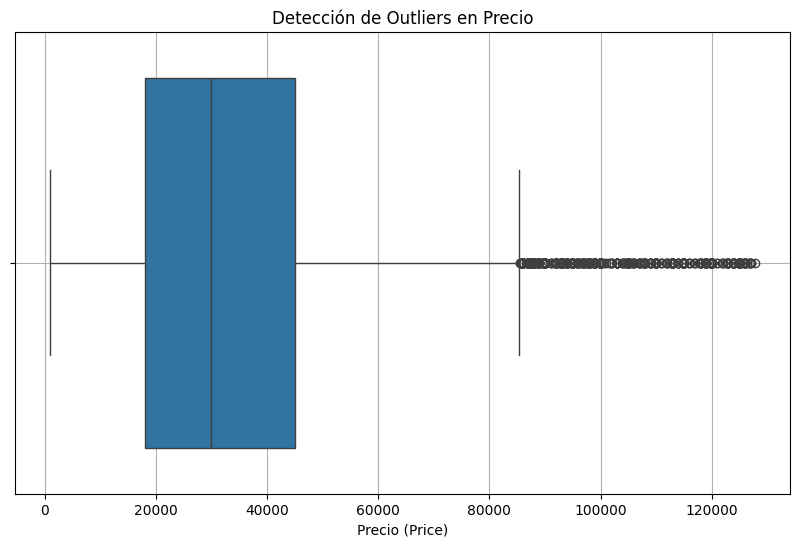

In [11]:
#  outliers utilizando boxplot para la columna 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Detección de Outliers en Precio')
plt.xlabel('Precio (Price)')
plt.grid(True)
plt.show()

In [13]:
# Tratamiento de outliers eliminando los que están fuera de 3 desviaciones estándar
z_scores = np.abs(stats.zscore(df['Price']))
df_filtered = df[(z_scores < 3)]

# verificamos de los datos después del tratamiento de outliers
print("\nNúmero de registros después de eliminar outliers:", len(df_filtered))


Número de registros después de eliminar outliers: 16541


In [17]:
# Nos aseguramos de usar el DataFrame sin outliers 
df_filtered = df[(np.abs(stats.zscore(df['Price'])) < 3)].copy()

# Estandarización (Z-score) .loc para evitar el warning SettingWithCopyWarning
scaler = StandardScaler()
df_filtered.loc[:, 'Price_scaled'] = scaler.fit_transform(df_filtered[['Price']])

# Normalización (Min-Max Scaling) .loc para evitar el warning SettingWithCopyWarning
min_max_scaler = MinMaxScaler()
df_filtered.loc[:, 'Price_normalized'] = min_max_scaler.fit_transform(df_filtered[['Price']])

# Mostrar las primeras filas de las columnas originales y transformadas
print(df_filtered[['Price', 'Price_scaled', 'Price_normalized']].head())

    Price  Price_scaled  Price_normalized
0    9999     -1.120060          0.071032
1  117990      3.778787          0.923435
2   79990      2.054975          0.623490
3   34990      0.013619          0.268293
4   15990     -0.848287          0.118320


In [29]:
# Ingeniería de Características: Crear nuevas variables
# Calcular la antigüedad del vehículo
df['Age'] = 2024 - df['Year']

# Crear nuevas características relacionadas
# Relación precio a edad
df['Price_to_Age_ratio'] = df.apply(lambda x: x['Price'] / x['Age'] if x['Age'] > 0 else 0, axis=1)

# Kilómetros por cilindrada
df['Kilometers_per_CC'] = df.apply(lambda x: x['Kilometers'] / x['CC'] if x['CC'] > 0 else 0, axis=1)

# Categoría de edad
df['Age_category'] = df['Age'].apply(lambda x: 'Nuevo' if x <= 1 else ('Semi-Nuevo' if x <= 5 else 'Antiguo'))

# Mostrar las primeras filas de las nuevas características
print(df[['Price_to_Age_ratio', 'Kilometers_per_CC', 'Age_category']].head())

# Aplicar One-Hot Encoding a la columna 'Gearbox'
df = pd.get_dummies(df, columns=['Gearbox'], drop_first=True)


   Price_to_Age_ratio  Kilometers_per_CC Age_category
0          714.214286         111.346317      Antiguo
1        39330.000000           0.008866   Semi-Nuevo
2        26663.333333           0.011199   Semi-Nuevo
3         2499.285714          56.266449      Antiguo
4         1998.750000          40.370824      Antiguo


In [34]:
# Mostrar las primeras filas del DataFrame con la nueva columna codificada
print("\nPrimeras filas del DataFrame con One-Hot Encoding para 'Gearbox':")
print(df[['Price_to_Age_ratio', 'Kilometers_per_CC', 'Age_category', 'Gearbox_Manual','Gearbox_Automatic',
       'Gearbox_Front', 'Gearbox_Manual', 'Gearbox_Rear']].head())



Primeras filas del DataFrame con One-Hot Encoding para 'Gearbox':
   Price_to_Age_ratio  Kilometers_per_CC Age_category  Gearbox_Manual  \
0          714.214286         111.346317      Antiguo           False   
1        39330.000000           0.008866   Semi-Nuevo           False   
2        26663.333333           0.011199   Semi-Nuevo           False   
3         2499.285714          56.266449      Antiguo           False   
4         1998.750000          40.370824      Antiguo           False   

   Gearbox_Automatic  Gearbox_Front  Gearbox_Manual  Gearbox_Rear  
0               True          False           False         False  
1               True          False           False         False  
2               True          False           False         False  
3               True          False           False         False  
4               True          False           False         False  


In [35]:
# Listar todos los nombres de columnas del DataFrame
print("\nNombres de todas las columnas del DataFrame:")
print(df.columns)


Nombres de todas las columnas del DataFrame:
Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity', 'Age', 'Price_to_Age_ratio', 'Kilometers_per_CC',
       'Age_category_Semi-Nuevo', 'Age_category', 'Gearbox_Automatic',
       'Gearbox_Front', 'Gearbox_Manual', 'Gearbox_Rear'],
      dtype='object')


In [36]:
# Verificar valores únicos en la columna 'Gearbox' para entender mejor las categorías
print("\nValores únicos en la columna 'Gearbox':")
print(df_original['Gearbox'].unique())


Valores únicos en la columna 'Gearbox':
['Automatic' 'Manual' 'Front' 'AWD' 'Rear']


In [37]:
# Ver estadísticas descriptivas de las nuevas variables
print("\nEstadísticas descriptivas de las nuevas variables:")
print(df[['Price_to_Age_ratio', 'Kilometers_per_CC']].describe())



Estadísticas descriptivas de las nuevas variables:
       Price_to_Age_ratio  Kilometers_per_CC
count        17048.000000       17048.000000
mean          7759.917674          43.567146
std          10663.148624          33.684240
min             41.666667           0.000464
25%           1726.568182          18.664621
50%           4300.000000          37.393430
75%           8722.000000          61.855995
max         149995.000000         772.753291


In [38]:
# Comparación de las estadísticas antes y después del preprocesamiento
print("\nAntes del preprocesamiento:")
print(df_original.describe())

print("\nDespués del preprocesamiento:")
print(df.describe())


Antes del preprocesamiento:
                 ID          Price          Year    Kilometers            CC  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36777.778038   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30305.015328      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       Seating Capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000  

Después del pre